In [2]:
# Install YOLOv8 and OpenCV
!pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.3 MB/s eta 0:00:00


In [3]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0))


CUDA available: True
GPU Name: Tesla T4


In [4]:
from google.colab import files
uploaded = files.upload()  # Upload zip of your dataset


Saving dataset.zip to dataset.zip


In [5]:
!unzip dataset.zip -d dataset


Streaming output truncated to the last 5000 lines.
 extracting: dataset/train/images/image_212_jpg.rf.d069731442d665e8ff93c6756970357d.jpg  
 extracting: dataset/train/images/image_212_jpg.rf.ddee0367ec32159a5de9a24cd1f4e57a.jpg  
 extracting: dataset/train/images/image_212_jpg.rf.ff0c211f9b450d28958dd9c64c7e3899.jpg  
 extracting: dataset/train/images/image_213_jpg.rf.041976225a336ed3a0346c03b6b94ca1.jpg  
 extracting: dataset/train/images/image_213_jpg.rf.31c0b37a1f1cb46131309b825616695d.jpg  
 extracting: dataset/train/images/image_213_jpg.rf.38efeeae4bc86d0971076a660a30e483.jpg  
 extracting: dataset/train/images/image_213_jpg.rf.3d4a2464f938de4ed7109ee295d1b020.jpg  
 extracting: dataset/train/images/image_213_jpg.rf.80c874b3147cdaa9f7a5dd500ce08d92.jpg  
 extracting: dataset/train/images/image_213_jpg.rf.8812908ff79d660d60aac84a72096223.jpg  
 extracting: dataset/train/images/image_213_jpg.rf.acc632b8ce9b533e0d896f502d808243.jpg  
 extracting: dataset/train/images/image_213_jpg.r

In [6]:
# Write data.yaml for YOLOv8
data_yaml = """
train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 8
names: ['Earplug', 'Gloves', 'Goggles', 'Helmet', 'Mask', 'Person', 'Shoes', 'Vest']


"""

with open("dataset/data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml created successfully!")


data.yaml created successfully!


In [7]:
!cat dataset/data.yaml



train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 8
names: ['Earplug', 'Gloves', 'Goggles', 'Helmet', 'Mask', 'Person', 'Shoes', 'Vest']




In [8]:
!ls /content/dataset


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [9]:
import os
os.getcwd()


'/content'

In [10]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

# Train and save with a custom folder
model.train(
    data="/content/dataset/data.yaml",
    epochs=50,
    imgsz=640,
    name="ppe_train"  # custom run name
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fal

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7be4d0ed6ae0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [27]:
from google.colab import files
files.download("/content/runs/detect/ppe_train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # pretrained, works immediately


In [31]:
from google.colab import files
uploaded = files.upload()


Saving best.pt to best.pt


In [32]:
!ls /content


 best.pt
 dataset
 dataset.zip
 gettyimages-632170387-612x612_jpg.rf.57469b3fd58041994fcdd7afecb9efa4.jpg
'image_177_jpg.rf.62f48de2dea19f3afd5f4ec38bd77b20 (1).jpg'
 image_177_jpg.rf.62f48de2dea19f3afd5f4ec38bd77b20.jpg
'IMG_0686 (1).JPG'
'IMG_0686 (2).JPG'
 IMG_0686.JPG
 IMG_0688.JPG
 runs
 sample_data
 yolo11n.pt
 yolov8n.pt


Saving Video1_222_jpg.rf.40be3d36e466173554259a72c5d1f05e.jpg to Video1_222_jpg.rf.40be3d36e466173554259a72c5d1f05e.jpg


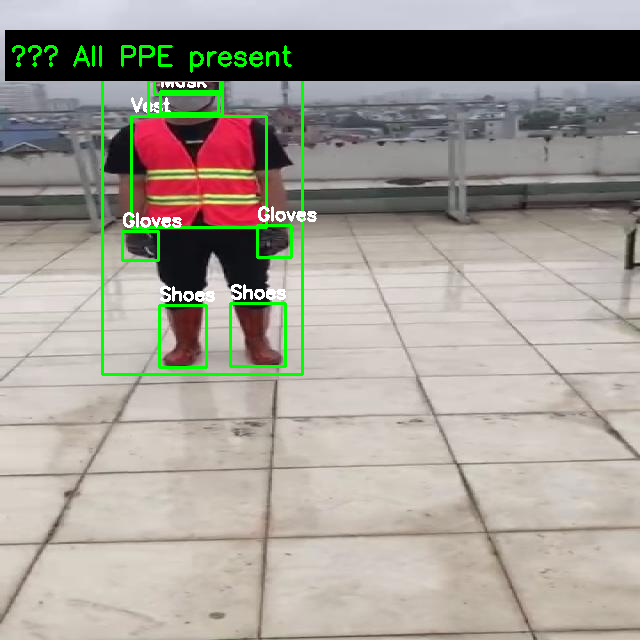


📸 Image: Video1_222_jpg.rf.40be3d36e466173554259a72c5d1f05e.jpg
🧾 Detected PPE: ['Vest', 'Person', 'Shoes', 'Shoes', 'Helmet', 'Gloves', 'Mask', 'Gloves', 'Goggles']
❌ Missing PPE: None — all present ✅


In [38]:
from ultralytics import YOLO
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

# -----------------------------

# Load trained YOLOv8 model

# -----------------------------

model = YOLO("best.pt")  # Path to your trained model

# -----------------------------

# Define environment-wise PPE requirements

# -----------------------------

ENV_PPE = {
"construction": ["Helmet", "Vest", "Shoes"],
"welding": ["Goggles", "Gloves", "Mask"],
"office": ["Vest", "Mask"],
}

# -----------------------------

# Upload image(s)

# -----------------------------

uploaded = files.upload()
env_choice = "welding"   # Change this to 'welding' or 'office' as needed
required_ppe = ENV_PPE[env_choice]

# -----------------------------

# Process each uploaded image

# -----------------------------

for img_name, img_bytes in uploaded.items():
# Save uploaded file
  with open(img_name, "wb") as f:
    f.write(img_bytes)


# Read image
frame = cv2.imread(img_name)

# Run inference
results = model.predict(source=img_name, conf=0.4, verbose=False)
r = results[0]

# Collect detected object names
detected_classes = [model.names[int(cls)] for cls in r.boxes.cls]

# Identify missing PPE items
missing_ppe = [item for item in required_ppe if item not in detected_classes]

# -----------------------------
# Draw detection boxes
# -----------------------------
for box in r.boxes:
    cls_id = int(box.cls[0])
    name = model.names[cls_id]
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, name, (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# -----------------------------
# Add status text
# -----------------------------
if missing_ppe:
    status_text = f"⚠ Missing: {', '.join(missing_ppe)}"
    color = (0, 0, 255)
else:
    status_text = "✅ All PPE present"
    color = (0, 255, 0)

cv2.rectangle(frame, (5, 30), (700, 80), (0, 0, 0), -1)
cv2.putText(frame, status_text, (10, 65),
            cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Show image
cv2_imshow(frame)
cv2.destroyAllWindows()

# -----------------------------
# Print summary
# -----------------------------
print(f"\n📸 Image: {img_name}")
print(f"🧾 Detected PPE: {detected_classes}")
print(f"❌ Missing PPE: {missing_ppe if missing_ppe else 'None — all present ✅'}")



WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.217 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1252.9±481.5 MB/s, size: 46.6 KB)
val: Scanning /content/dataset/valid/labels.cache... 326 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 326/326 111.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 3.6it/s 5.8s
                   all        326       2169      0.964      0.947      0.976      0.702
                Gloves        229        433      0.947      0.872       0.93      0.631
               Goggles        170        171      0.964      0.951      0.979      0.551
                Helmet        219        230      0.982      0.953      0.985      0.774
                  Mask        178        179      0.983       0

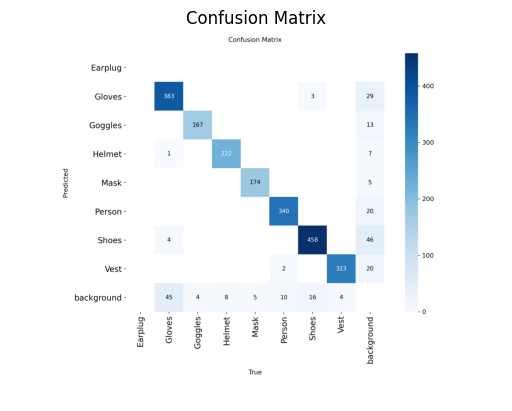

In [36]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("/content/best.pt")  # path to trained model

# Evaluate on validation set (defined in data.yaml)
metrics = model.val(data="dataset/data.yaml", split="val", imgsz=640, batch=16, save_json=True, save_hybrid=True, plots=True)

# Print results
print("\n📊 Evaluation Metrics:")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.mp:.4f}")
print(f"Recall: {metrics.box.mr:.4f}")
print("\n✅ Evaluation complete.")

# Display confusion matrix
plt.imshow(plt.imread("runs/detect/val/confusion_matrix.png"))
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()